In [1]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

X, y = make_blobs(n_samples=20, centers=[(0,0), (5,5), (-5, 5)], random_state=0)
X = np.vstack([X, np.array([[2, 4], [-1, 4], [1, 6]])])
y = np.append(y, [2, 1, 0])

In [2]:
np.random.seed(0)
height_m = 10*np.random.randn(50)+180
weight_m = 0.5*height_m + 5*np.random.randn(50)

height_f = 6*np.random.randn(50)+165
weight_f = 0.5*height_f + 4*np.random.randn(50)

In [3]:
m = np.vstack([height_m, weight_m]).transpose()
f = np.vstack([height_f, weight_f]).transpose()

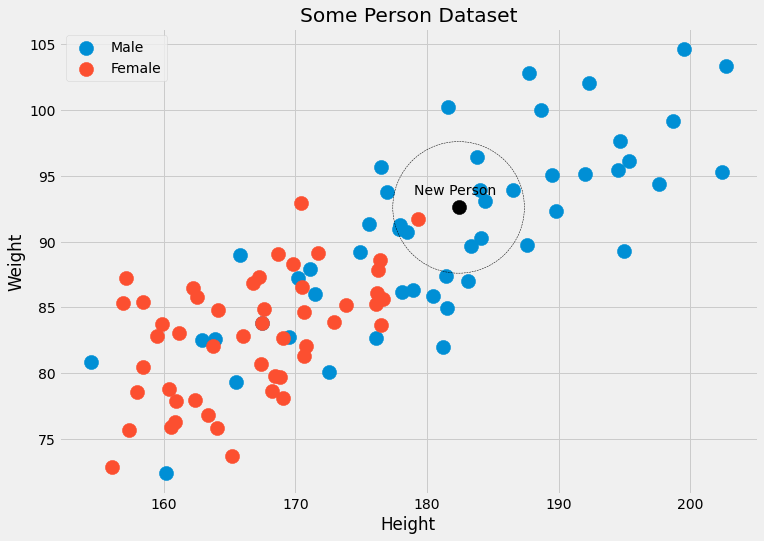

In [4]:
draw_circle = plt.Circle((182.4, 92.6), 5, fill=False, color='k', linestyle='dashed')

plt.figure(figsize=(16, 8))
plt.scatter(m[:, 0], m[:, 1], label='Male', s=200)
plt.scatter(f[:, 0], f[:, 1], label='Female', s=200)
plt.scatter([182.4], [92.6], c='k', s=200)
plt.annotate('New Person', (179, 93.6))
plt.ylabel('Weight')
plt.xlabel('Height')
plt.title('Some Person Dataset')
plt.legend()
plt.gcf().gca().add_artist(draw_circle)
plt.gcf().gca().set_aspect(1)

In [5]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class KNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.X_ = np.copy(X)
        self.y_ = np.copy(y)
        self.n_classes_ = self.y_.max() + 1
        
        return self
    
    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = []
        for x in X:
            distances = ((self.X_ - x)**2).sum(axis=1)
            smallest_distances = distances.argsort()[:self.k]
            closest_labels = self.y_[smallest_distances]
            count_labels = np.bincount(
                closest_labels,
                minlength=self.n_classes_
            )
            
            res.append(count_labels / count_labels.sum())
        
        return np.array(res)
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = self.predict_proba(X)
        
        return res.argmax(axis=1)

In [6]:
my_knn = KNNClassifier(k=3)
my_knn.fit(X, y)
my_knn.predict_proba([[0, 1], [0, 5], [3, 4]])

array([[1.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.66666667, 0.33333333]])

In [7]:
my_knn.predict([[0, 1], [0, 5], [3, 4]])

array([0, 0, 1], dtype=int64)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
my_knn.predict_proba([[0, 1], [0, 5], [3, 4]])

array([[1.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.66666667, 0.33333333]])

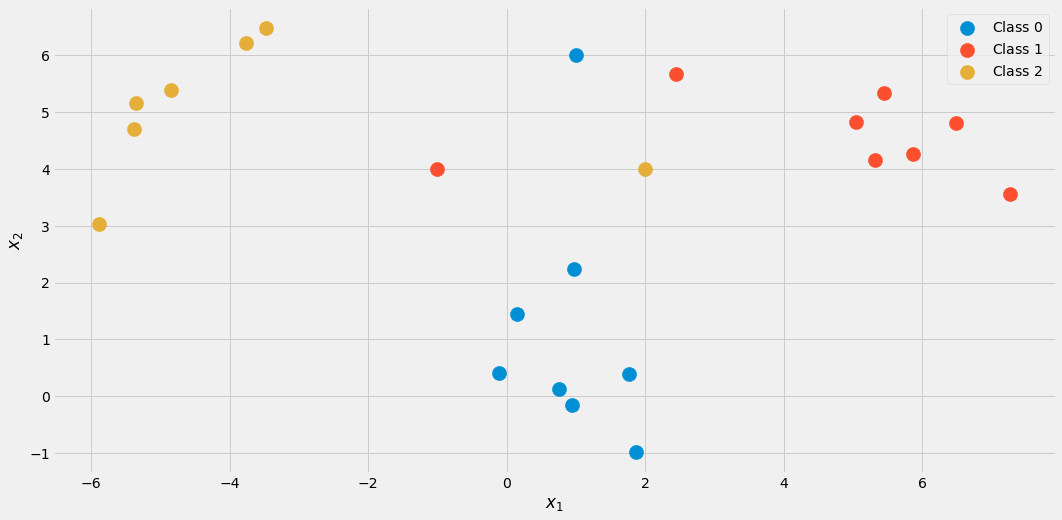

In [9]:
plt.figure(figsize=(16, 8))
for i in range(3):
    plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], s=200, label=f'Class ${i}$')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

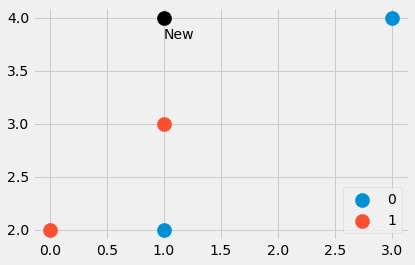

In [10]:
features = np.array([[1, 2], [3, 4], [1, 3], [0, 2]])
labels = np.array([0, 0, 1, 1])
new_point = np.array([1, 4])

plt.scatter(features[np.where(labels==0), 0], features[np.where(labels==0), 1], s=200, label='0')
plt.scatter(features[np.where(labels==1), 0], features[np.where(labels==1), 1], s=200, label='1')
plt.scatter(new_point[0], new_point[1], s=200, c='k')
plt.annotate('New', (new_point[0], new_point[1]-0.2))
plt.legend(loc='lower right')

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

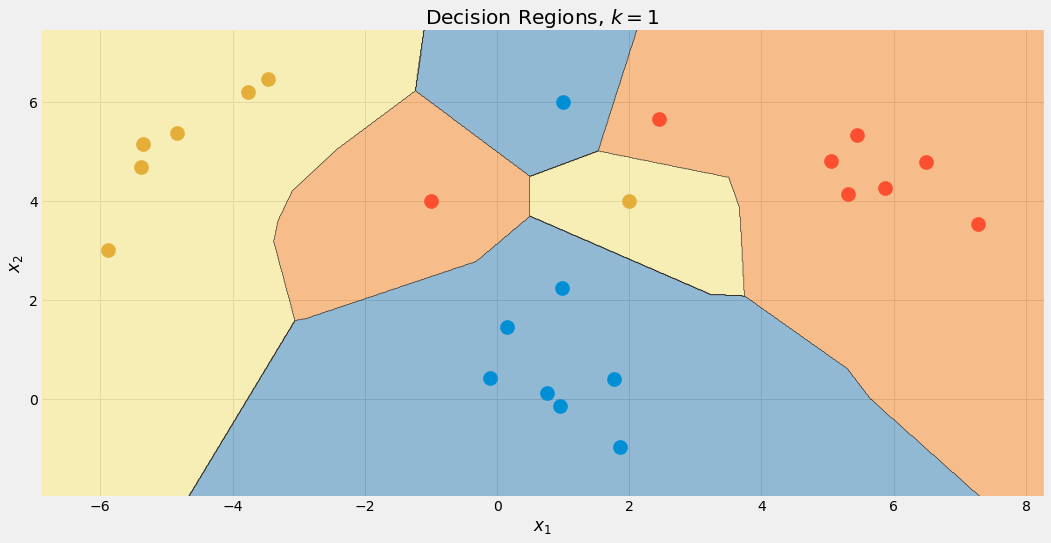

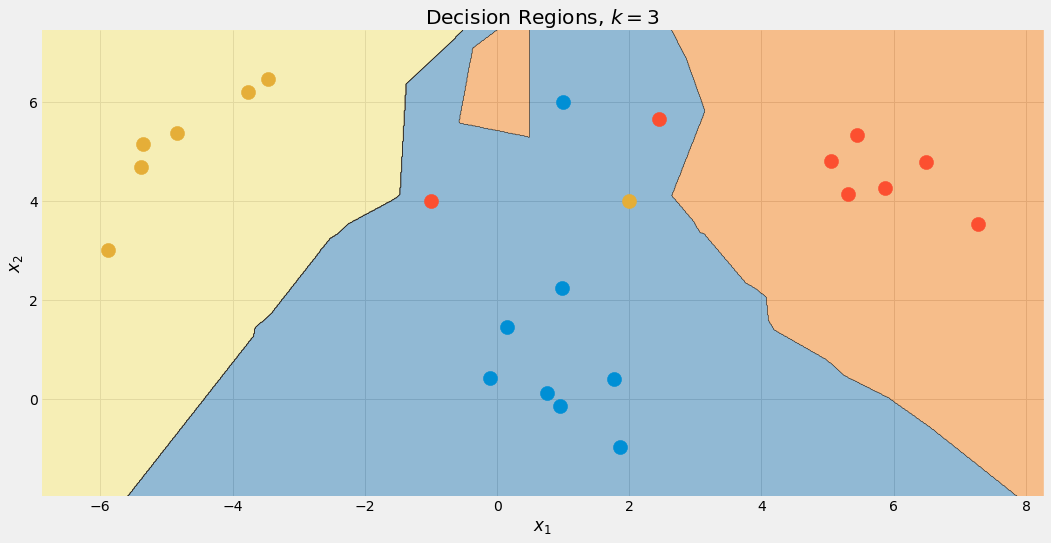

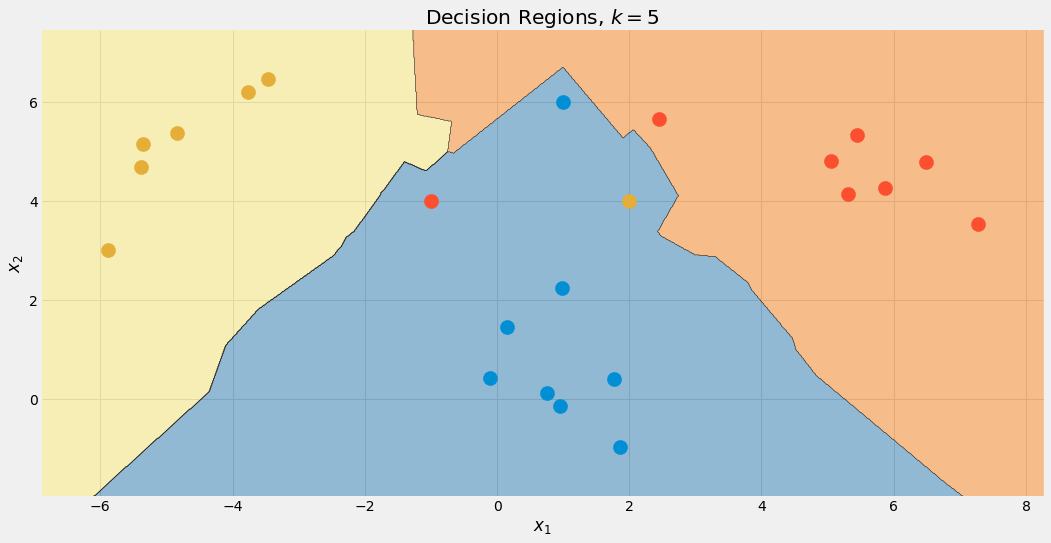

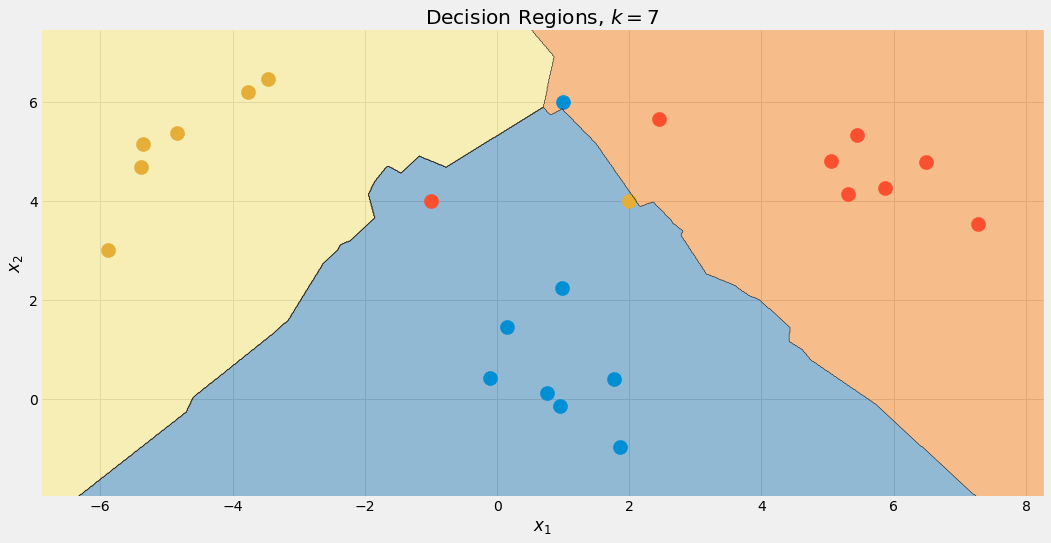

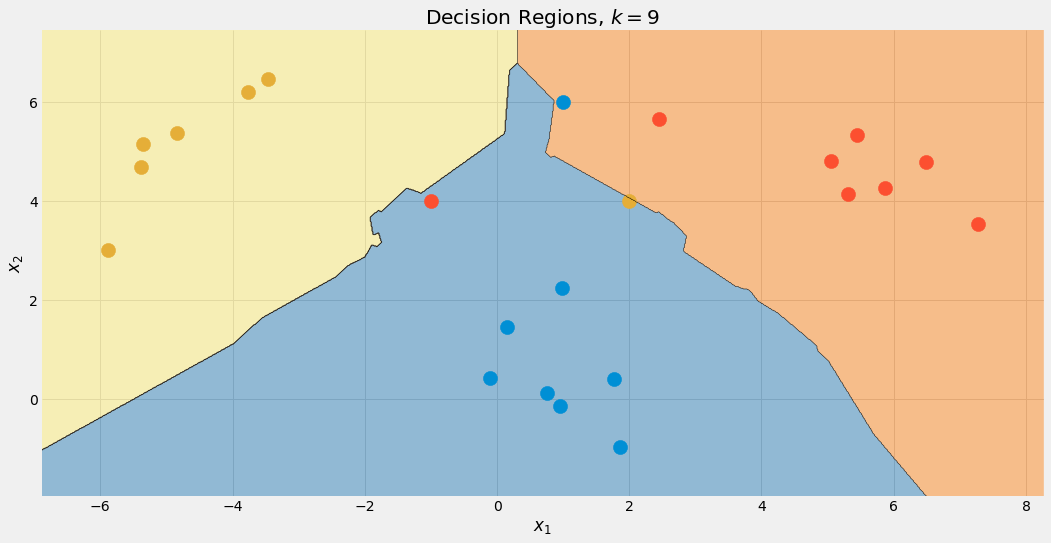

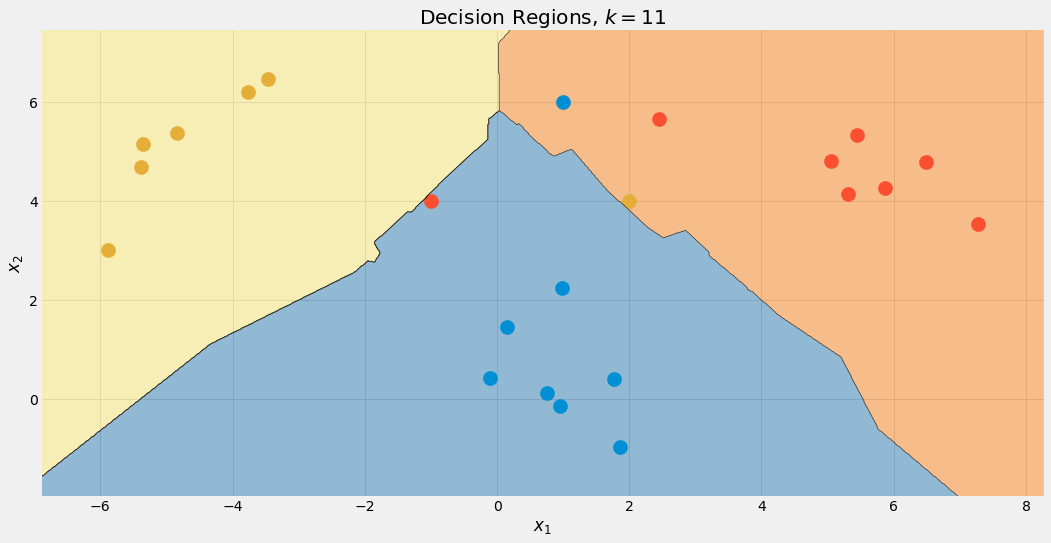

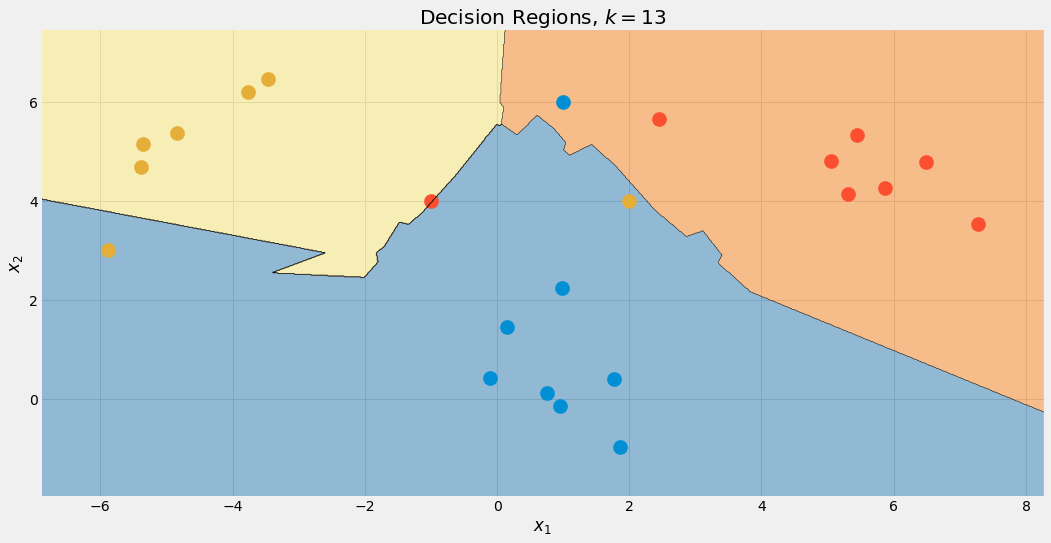

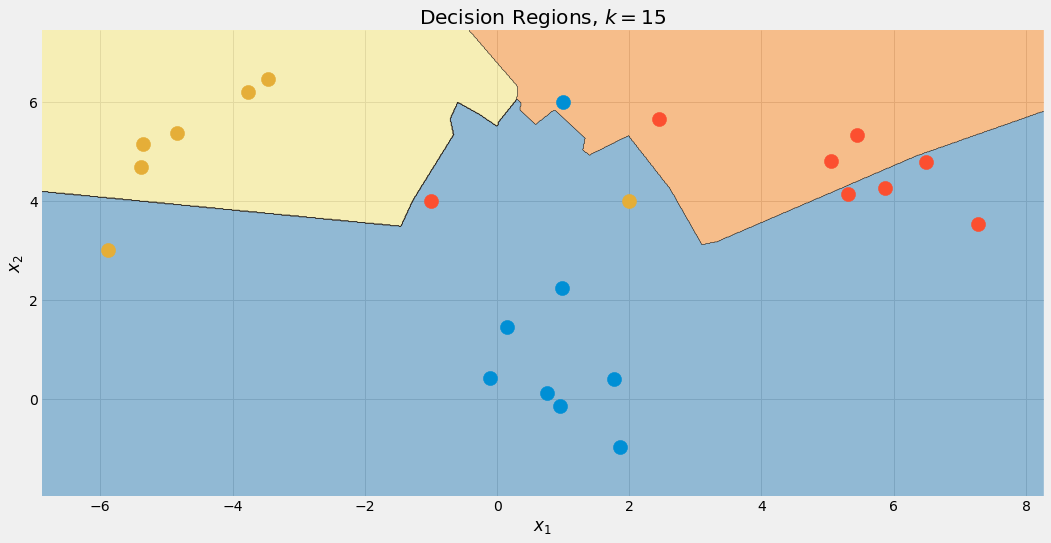

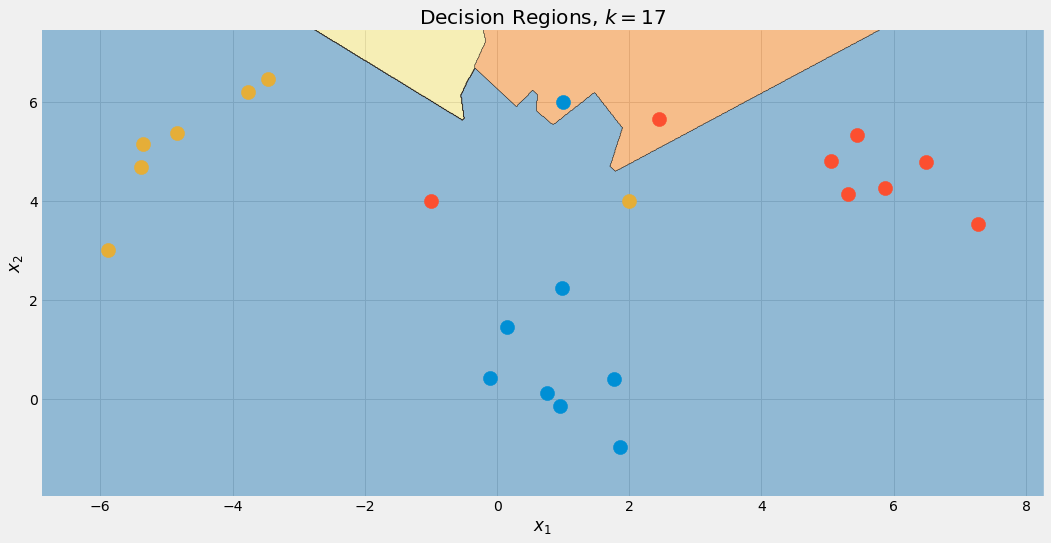

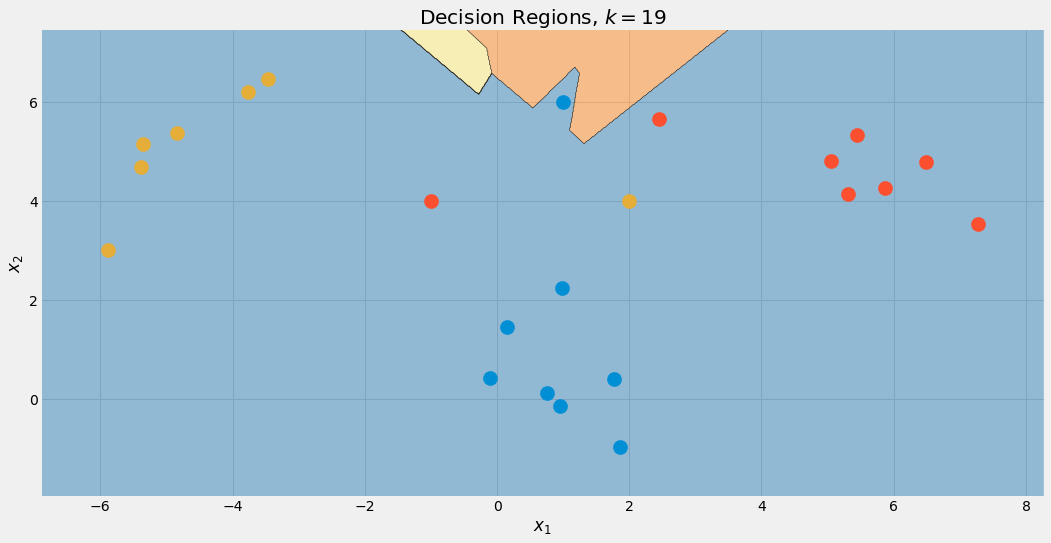

In [12]:
for k in [2*i+1 for i in range(10)]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    plt.figure(figsize=(16, 8))
    plot_decision_regions(X, y, clf=knn, legend=0, colors='#1f77b4,#ff7f0e,#ffec6e')

    for i in range(3):
        plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], s=200)
    #plt.scatter([0, 0, 3], [1, 5, 4], c='k', s=200)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'Decision Regions, $k={k}$')

In [36]:
X, _ = make_blobs(n_samples=20, centers=[(0,0)], random_state=0)
X = np.vstack([X, np.array([50, 50])])

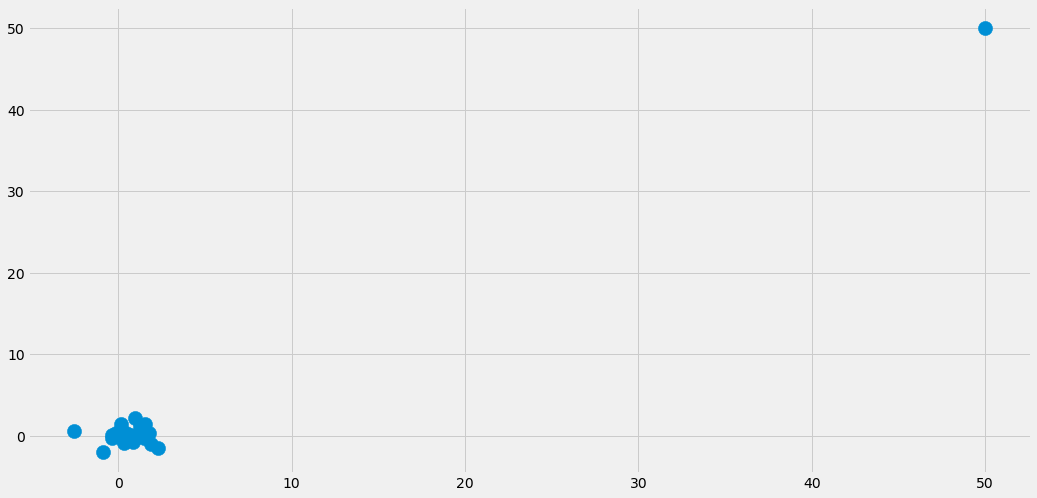

In [37]:
plt.figure(figsize=(16, 8))
plt.scatter(X[:, 0], X[:, 1], s=200)

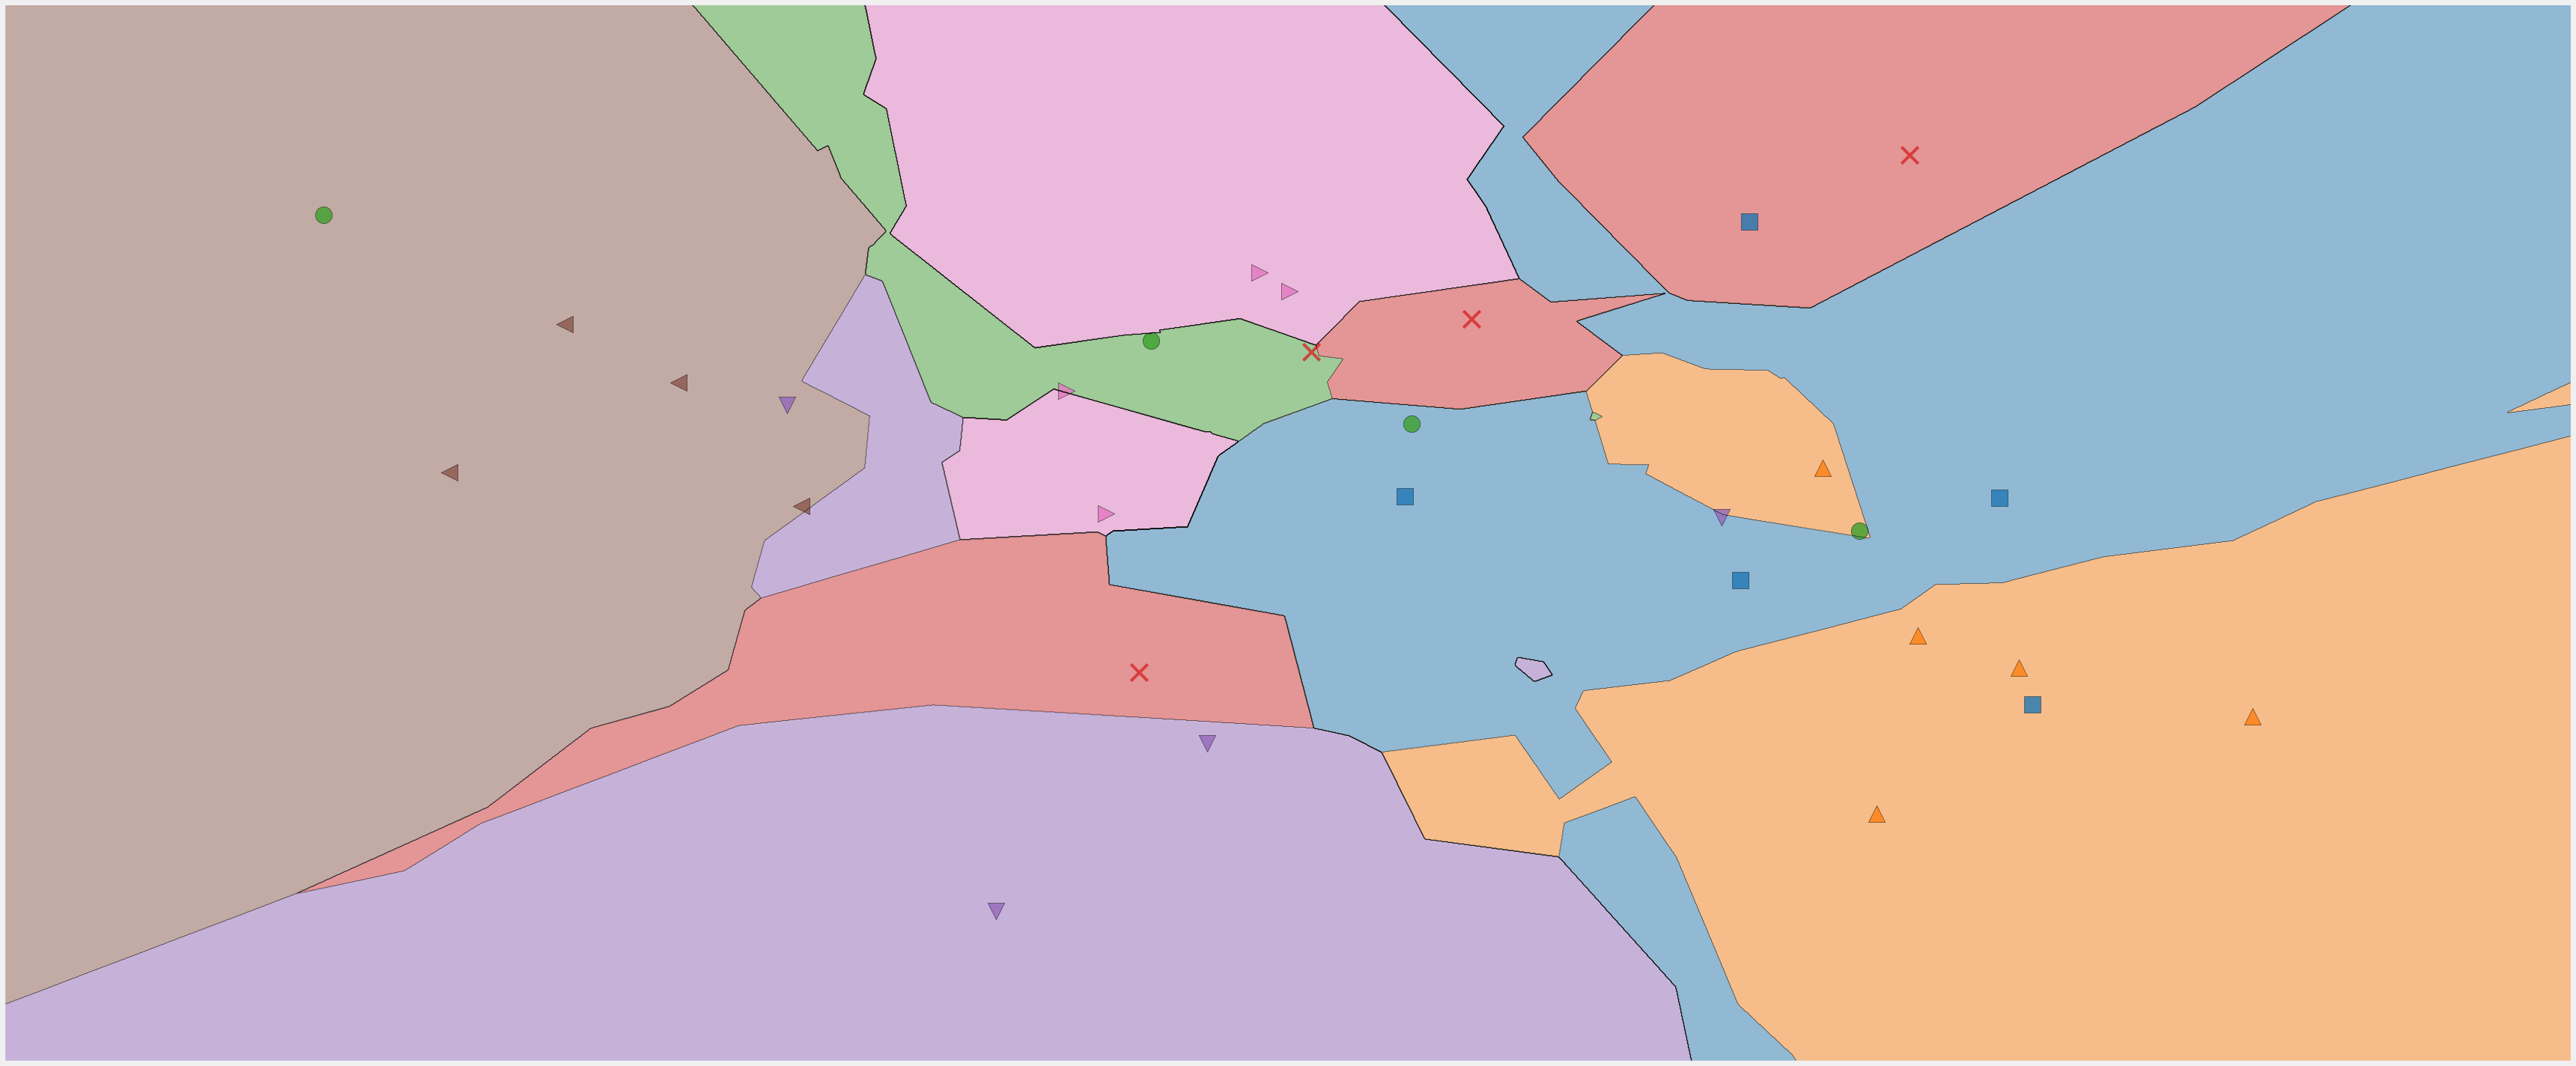

In [5]:
X, y = make_blobs(n_samples=30, centers=np.random.randn(7, 2), random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

plt.figure(figsize=(48, 20))
plot_decision_regions(X, y, clf=knn, legend=0, scatter_kwargs={'s': 500})
#for i in range(y.max()+1):
#    plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], c='k', s=200)
plt.axis('off')
plt.tight_layout()

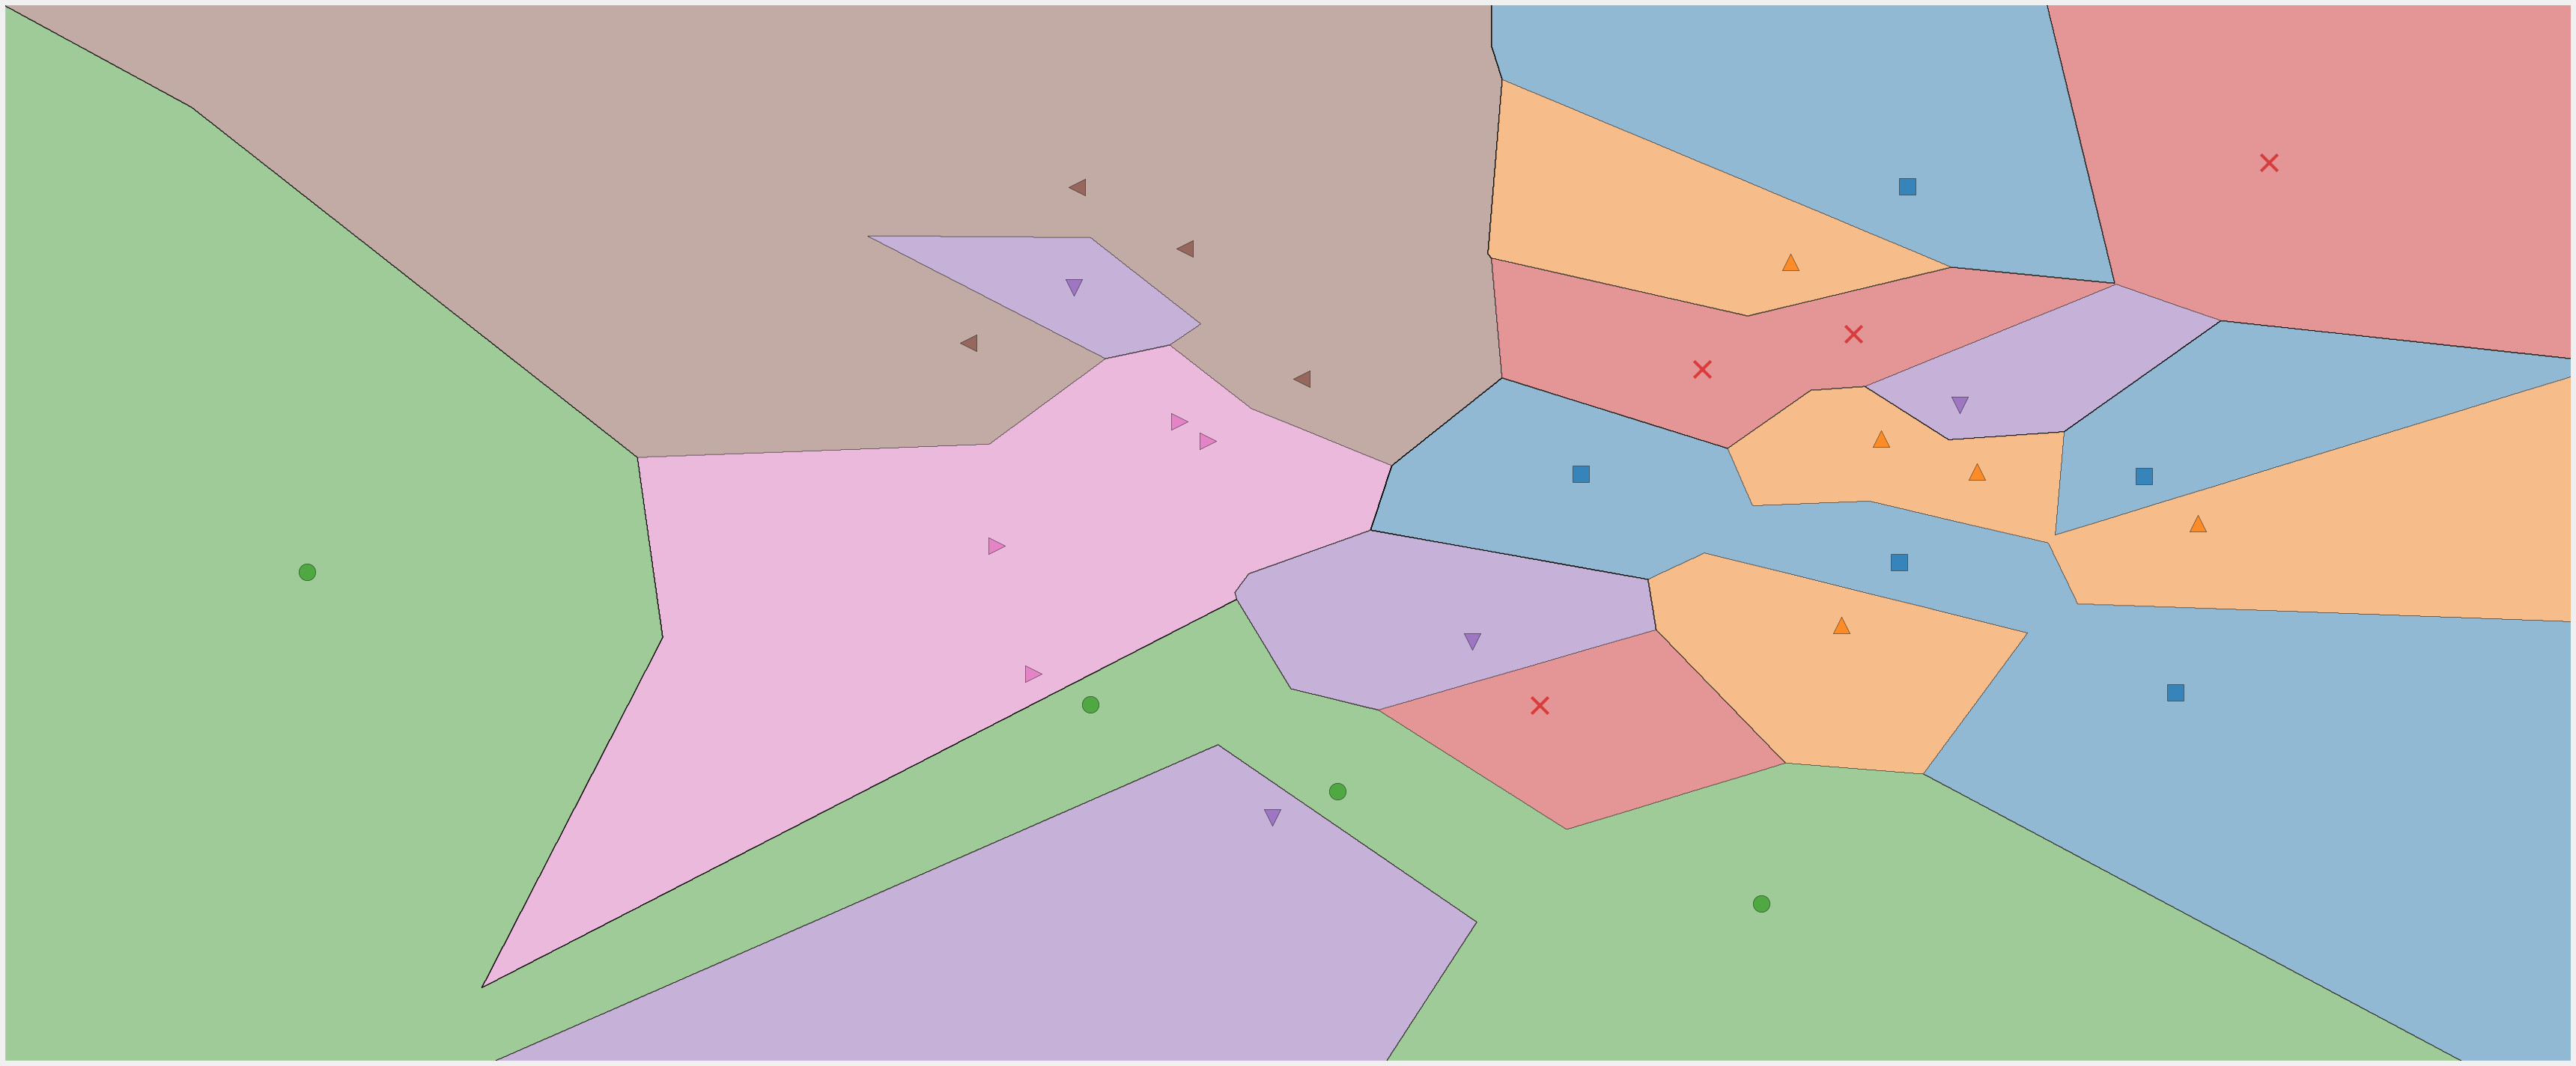

In [7]:
X, y = make_blobs(n_samples=30, centers=np.random.randn(7, 2), random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

plt.figure(figsize=(48, 20))
plot_decision_regions(X, y, clf=knn, legend=0, scatter_kwargs={'s': 500})
#for i in range(y.max()+1):
#    plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], c='k', s=200)
plt.axis('off')
plt.tight_layout()
